Sample Data:
  Transaction_ID Customer_ID      Region  Refund_Amount      Refund_Reason  \
0        TXN0001    CUST0001       South            111       Damaged Item   
1        TXN0002    CUST0002      Canada            391  Item Not Received   
2        TXN0003    CUST0003  West Coast            446    Duplicate Order   
3        TXN0004    CUST0004      Canada             68       Damaged Item   
4        TXN0005    CUST0005      Canada            226  Item Not Received   

  Transaction_Date  Fraud_Flag  
0       2024-11-23           0  
1       2024-02-27           0  
2       2024-01-13           0  
3       2025-01-14           1  
4       2024-05-20           1  

Fraud vs Non-Fraud Counts:
Fraud_Flag
0    418
1     82
Name: count, dtype: int64


C:\Users\ashas\AppData\Local\Temp\ipykernel_20796\102247035.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_fraud.index, y=monthly_fraud.values, palette="flare")


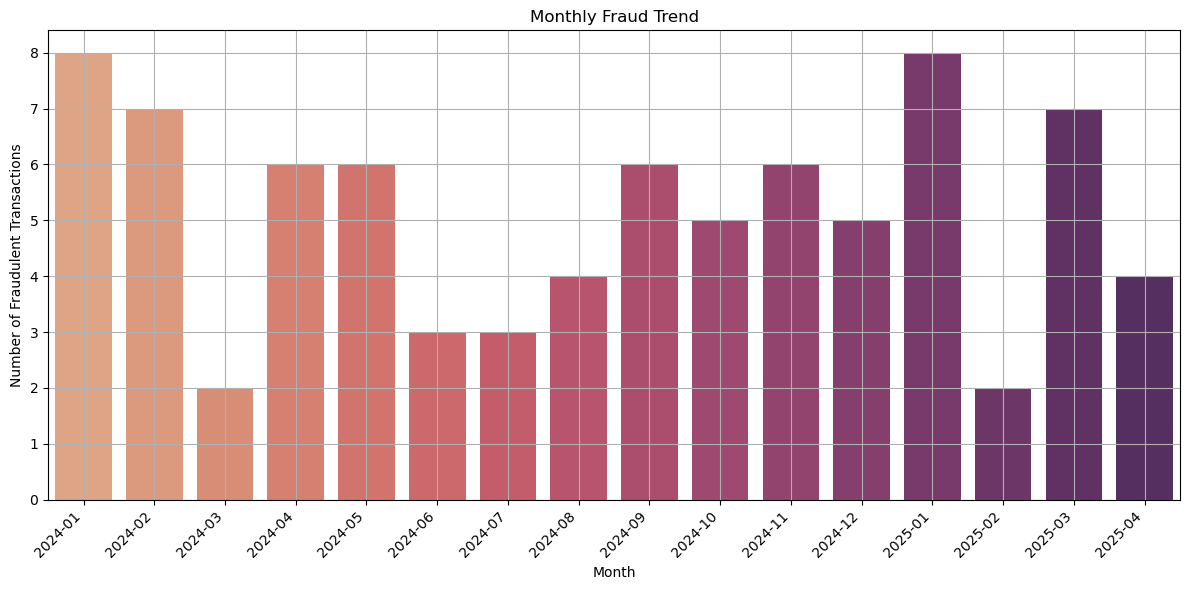

In [11]:
# fraud_trend_detection.ipynb

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = r'E:\\Project_Portfolio\\PROJECTS\\03-Operational-Risk-Analytics-Amazon\\dataset\\refund_transactions_sample.csv'
df = pd.read_csv(dataset_path, parse_dates=['Transaction_Date'])

# Preview the data
print("Sample Data:")
print(df.head())

# ---------------------------
# 1. Fraud Counts
# ---------------------------
fraud_counts = df['Fraud_Flag'].value_counts()
print("\nFraud vs Non-Fraud Counts:")
print(fraud_counts)

# ---------------------------
# 2. Fraud Trend Over Time
# ---------------------------
# Create a Month column
df['Month'] = df['Transaction_Date'].dt.to_period('M').astype(str)

# Group frauds by Month
monthly_fraud = df[df['Fraud_Flag'] == 1].groupby('Month').size()

# Plot the fraud trend over time
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_fraud.index, y=monthly_fraud.values, palette="flare")
plt.title('Monthly Fraud Trend')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()
